# Installation

In [207]:
#!pip install matplotlib

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# for model building

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.feature_selection import RFE

# for model evaluation

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# Introduction of Data

In [71]:
df_origin = pd.read_csv("/Users/jessicazhang/Desktop/dataCleaned.csv")

In [74]:
df_origin.columns

Index(['Type1', 'Type2', 'Type3', 'Rooms', 'Bathroom', 'Car', 'Landsize',
       'BuildingArea', 'Distance', 'YearBuilt', 'Price'],
      dtype='object')

In [75]:
df_origin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5268 entries, 0 to 5267
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Type1         5268 non-null   int64  
 1   Type2         5268 non-null   int64  
 2   Type3         5268 non-null   int64  
 3   Rooms         5268 non-null   int64  
 4   Bathroom      5268 non-null   int64  
 5   Car           5268 non-null   int64  
 6   Landsize      5268 non-null   int64  
 7   BuildingArea  5268 non-null   float64
 8   Distance      5268 non-null   float64
 9   YearBuilt     5268 non-null   int64  
 10  Price         5268 non-null   int64  
dtypes: float64(2), int64(9)
memory usage: 452.8 KB


In [76]:
df_origin.head()

,Type1,Type2,Type3,Rooms,Bathroom,Car,Landsize,BuildingArea,Distance,YearBuilt,Price
0,1,0,0,4,3,2,1001,315.00,21.8,2012,990000
1,1,0,0,5,4,2,1000,324.00,13.7,1950,2600000
2,1,0,0,4,1,1,1000,203.00,10.7,1960,1920000
3,1,0,0,3,1,4,1000,85.00,8.2,1930,1575000
4,1,0,0,2,1,0,1000,81.79,36.9,1980,655000


In [77]:
df_origin.shape

(5268, 11)

In [78]:
df_origin.describe()

,Type1,Type2,Type3,Rooms,Bathroom,Car,Landsize,BuildingArea,Distance,YearBuilt,Price
count,5268.000000,5268.000000,5268.000000,5268.000000,5268.000000,5268.000000,5268.000000,5268.000000,5268.000000,5268.000000,5.268000e+03
mean,0.831435,0.079537,0.089028,3.209377,1.658694,1.702923,469.264617,158.306403,10.982536,1960.378322,1.171191e+06
std,0.374403,0.270600,0.284811,0.841994,0.717612,0.970426,222.585258,86.560294,6.004801,38.936988,6.438934e+05
min,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,100.000000,51.000000,1.200000,1196.000000,1.310000e+05
25%,1.000000,0.000000,0.000000,3.000000,1.000000,1.000000,267.000000,109.000000,7.000000,1930.000000,7.283750e+05
50%,1.000000,0.000000,0.000000,3.000000,2.000000,2.000000,492.500000,138.000000,10.400000,1960.000000,1.000000e+06
75%,1.000000,0.000000,0.000000,4.000000,2.000000,2.000000,648.000000,184.000000,13.700000,1995.000000,1.435000e+06
max,1.000000,1.000000,1.000000,8.000000,6.000000,10.000000,1001.000000,3112.000000,47.300000,2018.000000,6.400000e+06


In [79]:
df_origin.corr()

,Type1,Type2,Type3,Rooms,Bathroom,Car,Landsize,BuildingArea,Distance,YearBuilt,Price
Type1,1.000000,-0.652847,-0.694291,0.136671,0.067783,0.132832,0.313631,0.089195,0.133726,0.025864,0.052545
Type2,-0.652847,1.000000,-0.091895,-0.134768,-0.052790,-0.131968,-0.302575,-0.096512,-0.122486,-0.002046,-0.051926
Type3,-0.694291,-0.091895,1.000000,-0.051618,-0.038948,-0.049233,-0.124810,-0.025556,-0.059416,-0.032057,-0.019738
Rooms,0.136671,-0.134768,-0.051618,1.000000,0.589627,0.340335,0.433966,0.544157,0.164614,0.072805,0.405078
Bathroom,0.067783,-0.052790,-0.038948,0.589627,1.000000,0.271780,0.197372,0.525496,0.069602,0.235935,0.436593
Car,0.132832,-0.131968,-0.049233,0.340335,0.271780,1.000000,0.398471,0.266207,0.219037,0.194377,0.137674
Landsize,0.313631,-0.302575,-0.124810,0.433966,0.197372,0.398471,1.000000,0.310288,0.352840,0.031179,0.223600
BuildingArea,0.089195,-0.096512,-0.025556,0.544157,0.525496,0.266207,0.310288,1.000000,0.058570,0.130430,0.457088
Distance,0.133726,-0.122486,-0.059416,0.164614,0.069602,0.219037,0.352840,0.058570,1.000000,0.394375,-0.335547
YearBuilt,0.025864,-0.002046,-0.032057,0.072805,0.235935,0.194377,0.031179,0.130430,0.394375,1.000000,-0.286517


# Analyzing Data

### Convert the YearBuilt

In [80]:
df_origin["YearBuilt"] = 2021 - df_origin["YearBuilt"]
df_origin.head()

,Type1,Type2,Type3,Rooms,Bathroom,Car,Landsize,BuildingArea,Distance,YearBuilt,Price
0,1,0,0,4,3,2,1001,315.00,21.8,9,990000
1,1,0,0,5,4,2,1000,324.00,13.7,71,2600000
2,1,0,0,4,1,1,1000,203.00,10.7,61,1920000
3,1,0,0,3,1,4,1000,85.00,8.2,91,1575000
4,1,0,0,2,1,0,1000,81.79,36.9,41,655000


### Outlier detection {Method 1}

#### Landsize

In [81]:
print(df_origin["Landsize"].describe())

count    5268.000000
mean      469.264617
std       222.585258
min       100.000000
25%       267.000000
50%       492.500000
75%       648.000000
max      1001.000000
Name: Landsize, dtype: float64


#### Building Area

In [83]:
print(df_origin["BuildingArea"].describe())

count    5268.000000
mean      158.306403
std        86.560294
min        51.000000
25%       109.000000
50%       138.000000
75%       184.000000
max      3112.000000
Name: BuildingArea, dtype: float64


#### Distance

In [53]:
print(df_origin["Distance"].describe())

count    5268.000000
mean       10.982536
std         6.004801
min         1.200000
25%         7.000000
50%        10.400000
75%        13.700000
max        47.300000
Name: Distance, dtype: float64


#### YearBuilt

In [82]:
print(df_origin["YearBuilt"].describe())

count    5268.000000
mean       60.621678
std        38.936988
min         3.000000
25%        26.000000
50%        61.000000
75%        91.000000
max       825.000000
Name: YearBuilt, dtype: float64


### Method 2: Histogram

array([[<AxesSubplot:title={'center':'Type1'}>,
        <AxesSubplot:title={'center':'Type2'}>,
        <AxesSubplot:title={'center':'Type3'}>],
       [<AxesSubplot:title={'center':'Rooms'}>,
        <AxesSubplot:title={'center':'Bathroom'}>,
        <AxesSubplot:title={'center':'Car'}>],
       [<AxesSubplot:title={'center':'Landsize'}>,
        <AxesSubplot:title={'center':'BuildingArea'}>,
        <AxesSubplot:title={'center':'Distance'}>],
       [<AxesSubplot:title={'center':'YearBuilt'}>,
        <AxesSubplot:title={'center':'Price'}>, <AxesSubplot:>]],
      dtype=object)

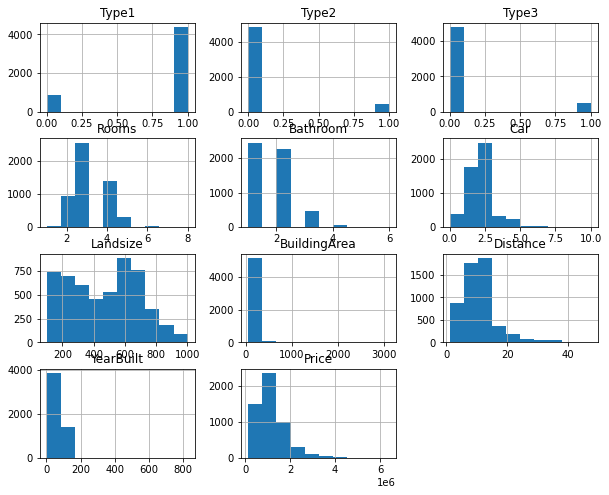

In [84]:
df_origin.hist()

### Method 3: Other diagrams

<AxesSubplot:xlabel='YearBuilt', ylabel='Price'>

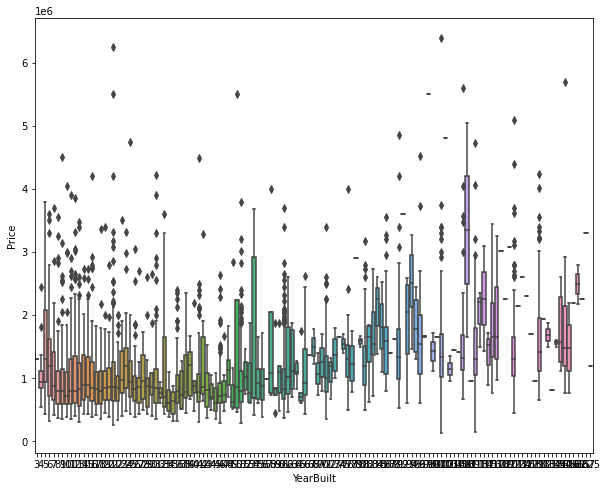

In [86]:
# Boxplot: Example
sns.boxplot(x='YearBuilt',y='Price',data=df_origin)

# comment: from the graph, it shows little correlation

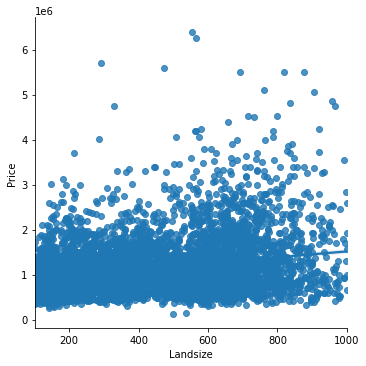

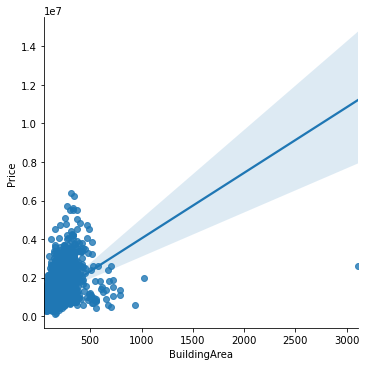

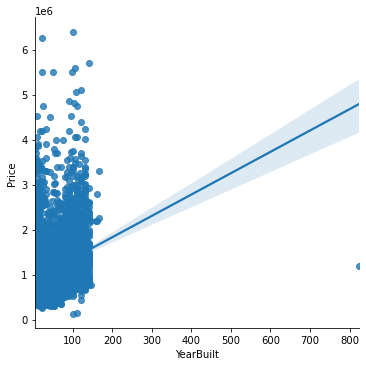

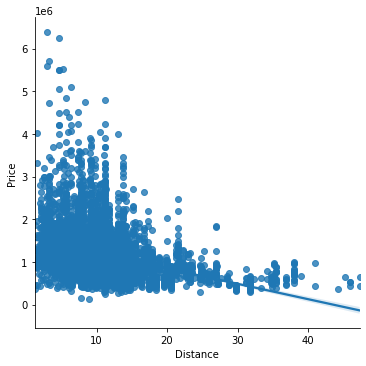

In [89]:
# Scatterplot
sns.lmplot(x='Landsize', y='Price', data=df_origin)
sns.lmplot(x='BuildingArea', y='Price', data=df_origin)
sns.lmplot(x='YearBuilt', y='Price', data=df_origin)
sns.lmplot(x='Distance', y='Price', data=df_origin)

### Method 4: Formula (Data Size)

In [180]:
# Checking the percentage of outlier for all the numerical columns
# Formula: x > Q3 + 1.5IQR or x < Q1 -1.5IQR

# Single
# Calculate or Find on the graph
Q1 = df_origin.BuildingArea.quantile(0.25)
Q3 = df_origin.BuildingArea.quantile(0.75)
print("Q1:",Q1)
print("Q3:", Q3)

# IQR (Inter Quatile Range) = Q3 - Q1
IQR = Q3 - Q1

# Limit
Lower_limit = Q1 - 1.5*IQR
Upper_limit = Q3 + 1.5*IQR
print("Lower_limit:", Lower_limit)
print("Upper_limit:", Upper_limit)

Q1: 109.0
Q3: 184.0
Lower_limit: -3.5
Upper_limit: 296.5


### Delete outliers

In [177]:
# (1) Delete outliers using the code? How?

deleted_indices = []
for col in df_origin.columns[6:9]:
    Q1 = df_origin[col].quantile(0.25)
    Q3 = df_origin[col].quantile(0.75)
    print("{}, Q1: {:.2f}, Q3: {:.2f}".format(col, Q1, Q3))
  
    # IQR (Inter Quatile Range) = Q3 - Q1
    IQR = Q3 - Q1

    # Limit
    Lower_limit = Q1 - 1.5*IQR
    Upper_limit = Q3 + 1.5*IQR
    
    Upper_num = (df_origin[df_origin[col] > Upper_limit]).shape[0]
    Lower_num = (df_origin[df_origin[col] < Lower_limit]).shape[0]
    outlier_rate = (Lower_num + Upper_num) / df_origin.shape[0]
    Upper_index = list((df_origin[df_origin[col] > Upper_limit]).index)
    Lower_index = list((df_origin[df_origin[col] < Lower_limit]).index)
    deleted_indices += (Upper_index + Lower_index)
    
    print("Lower_limit:{:.2f}, Upper_limit:{:.2f}, outlier_rate: {:.4f}% \n---\n".format(Lower_limit, Upper_limit, outlier_rate*100))

new_df = df_origin.drop(list(set(deleted_indices)), axis=0)

# (2) After finding the most obvious point on the graph, then you can just delete it on Excel. {Based on this one}

Landsize, Q1: 267.00, Q3: 648.00
Lower_limit:-304.50, Upper_limit:1219.50, outlier_rate: 0.0000% 
---

BuildingArea, Q1: 109.00, Q3: 184.00
Lower_limit:-3.50, Upper_limit:296.50, outlier_rate: 5.2202% 
---

Distance, Q1: 7.00, Q3: 13.70
Lower_limit:-3.05, Upper_limit:23.75, outlier_rate: 3.7585% 
---



# Read New .csv

In [208]:
df = pd.read_csv("/Users/jessicazhang/Desktop/data.csv")

In [209]:
df.shape

(5267, 11)

In [210]:
df["YearBuilt"] = 2021 - df["YearBuilt"]
df.head()

,Type1,Type2,Type3,Rooms,Bathroom,Car,Landsize,BuildingArea,Distance,YearBuilt,Price
0,0,0,1,5,2,1,531,1022.0,5.6,131,1975000
1,1,0,0,3,1,1,532,934.0,16.3,41,580500
2,1,0,0,3,1,1,792,792.0,12.2,71,1365000
3,1,0,0,5,3,2,836,789.0,24.8,20,1100000
4,1,0,0,3,1,2,713,720.0,9.2,71,1903000


# Data Visualisation

### Correlation in numeric data

##### Method 1

<AxesSubplot:>

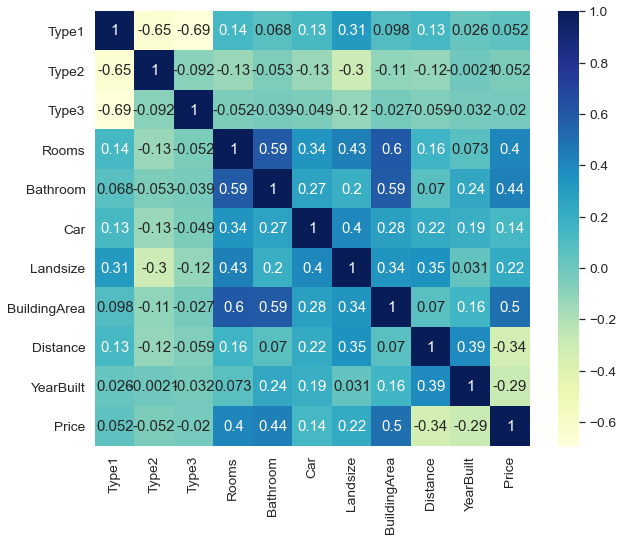

In [132]:
# General
sns.heatmap(df.corr(), square=True, annot=True, cmap="YlGnBu")

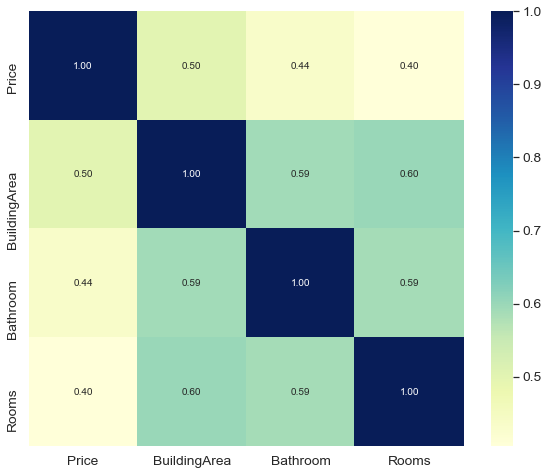

In [133]:
# Pick the top four
# correlation matrix
corrmat = df.corr()
k = 4 # number of variables for heatmap
cols = corrmat.nlargest(k, 'Price')['Price'].index # choose the top four features that have relationship with price
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale = 1.25)
# cmap means the color, annot short for "annotation"
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size':10}, yticklabels=cols, xticklabels=cols.values, cmap="YlGnBu")
plt.show()

##### Method 2

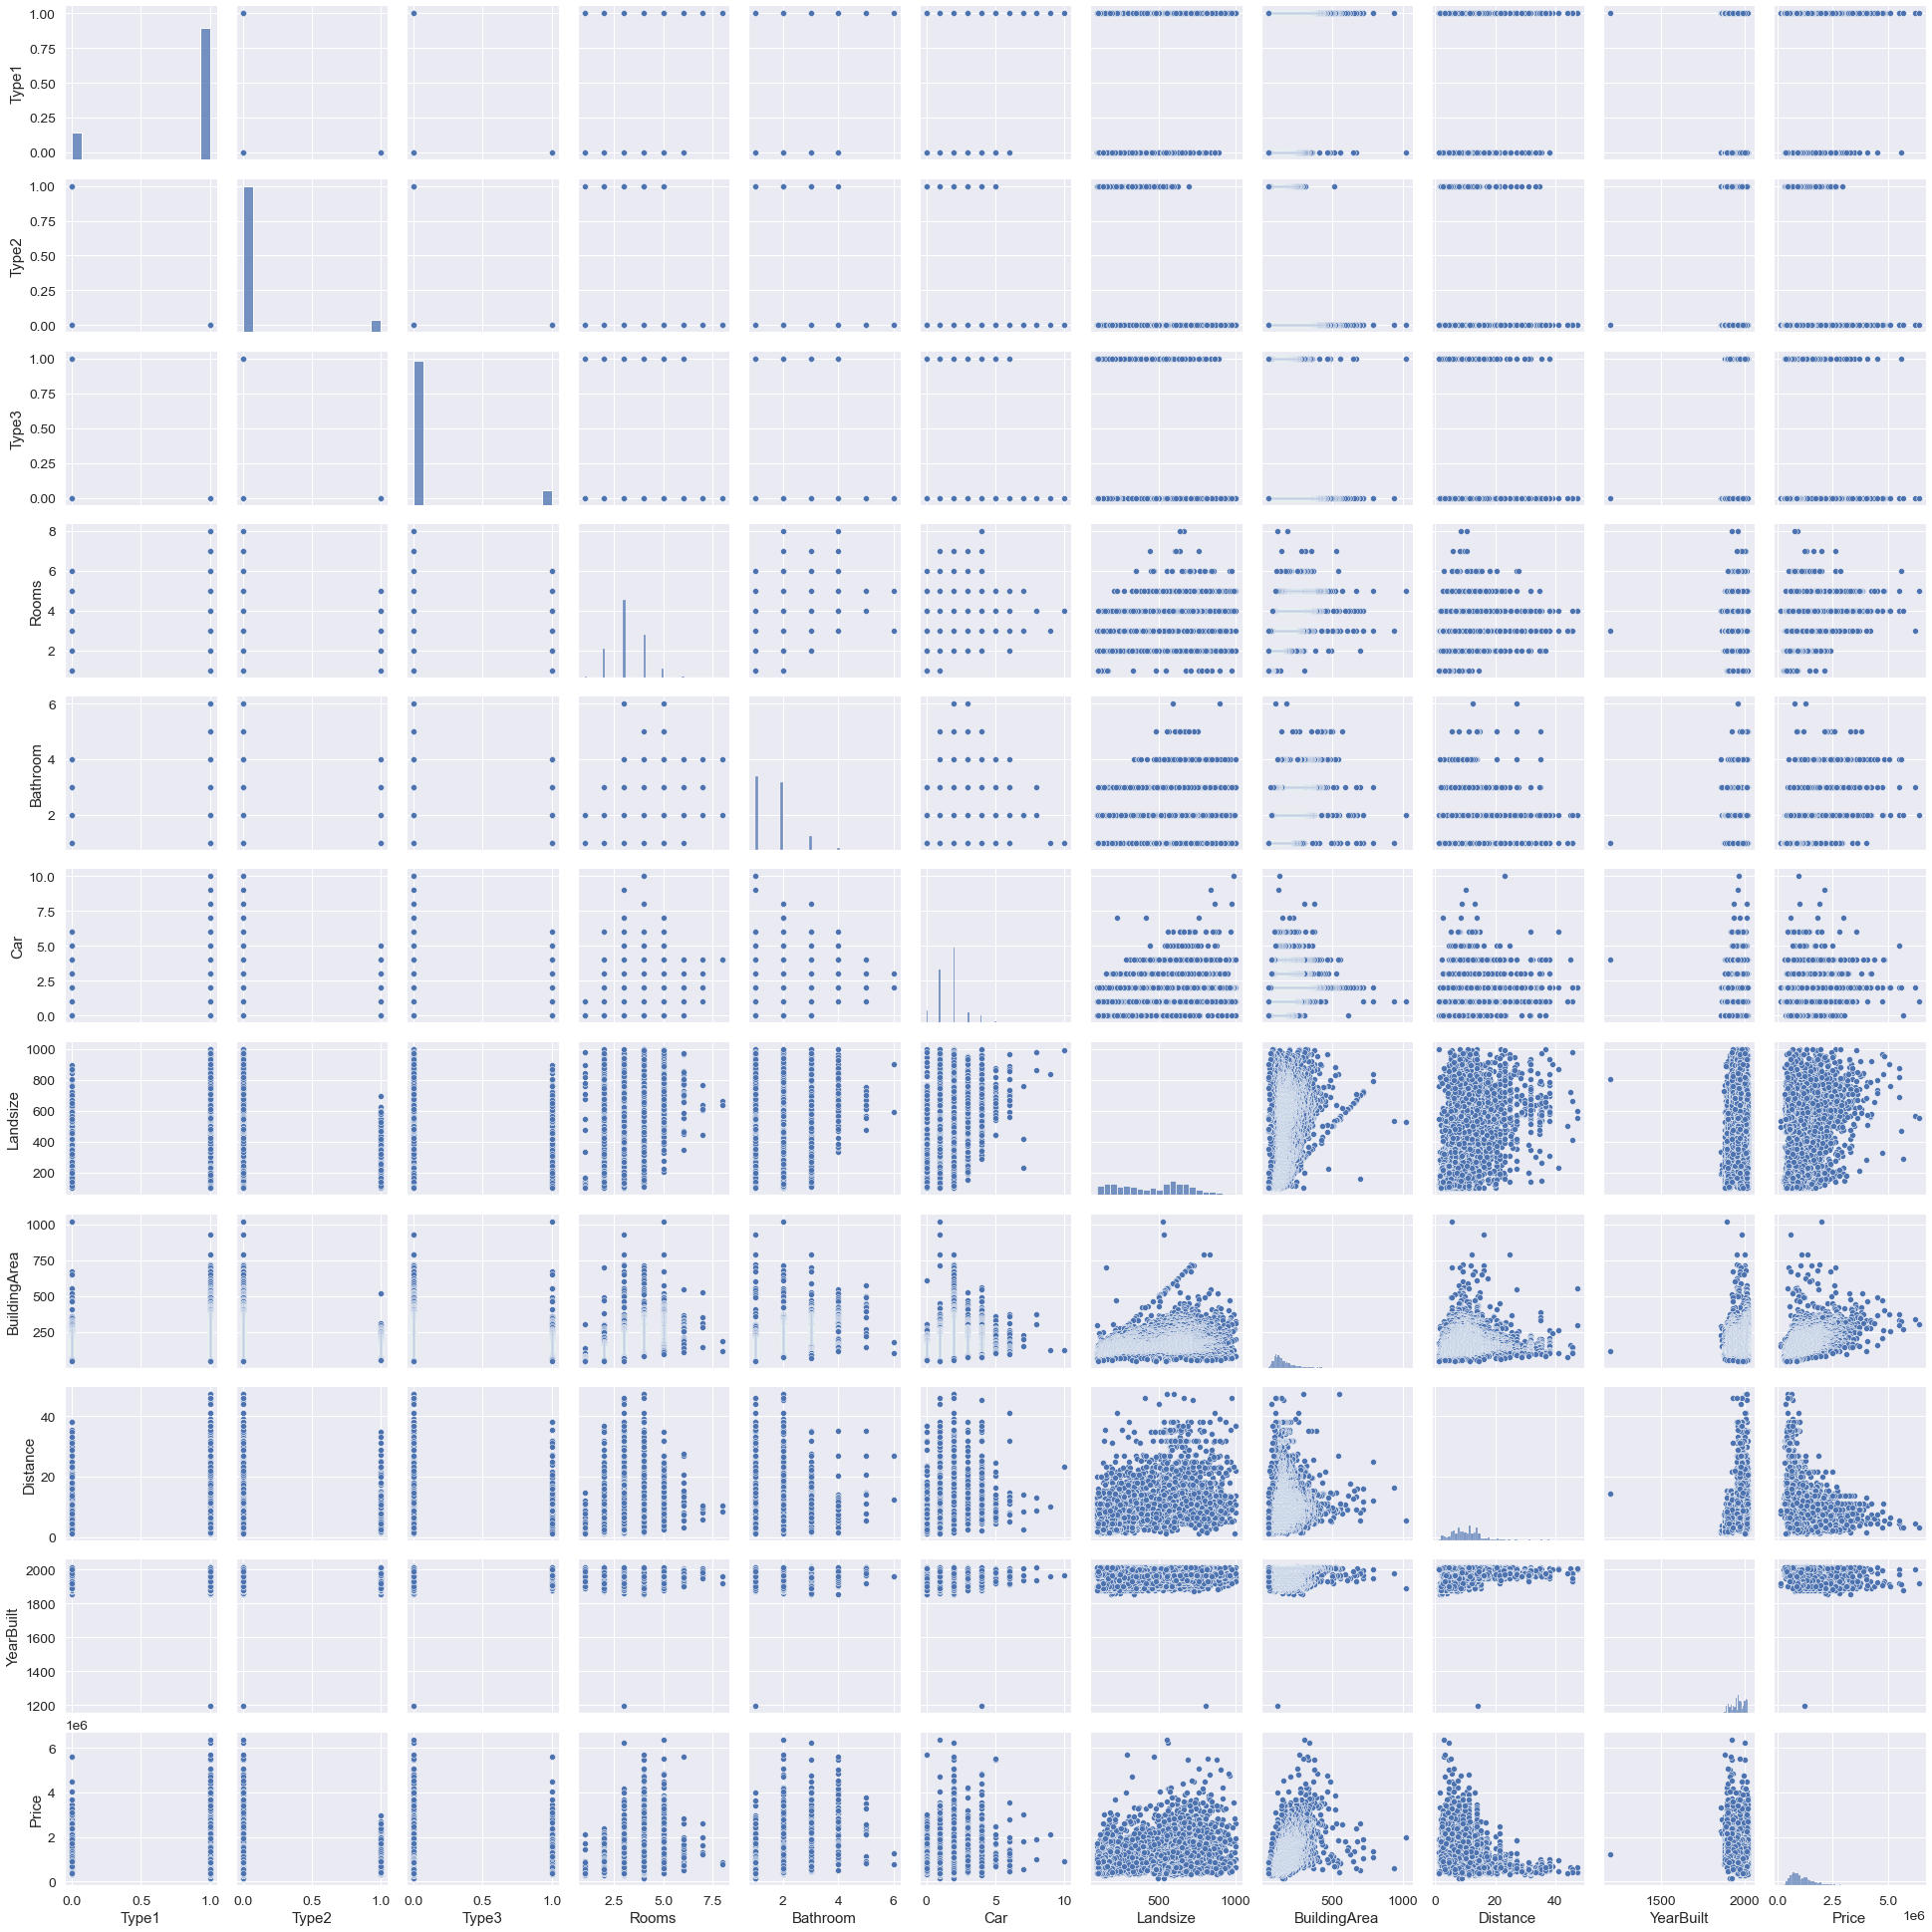

In [134]:
# Show correlation
# scatterplot
sns.pairplot(df)

##### Method 3: Enlarged scatterplots (x&y)

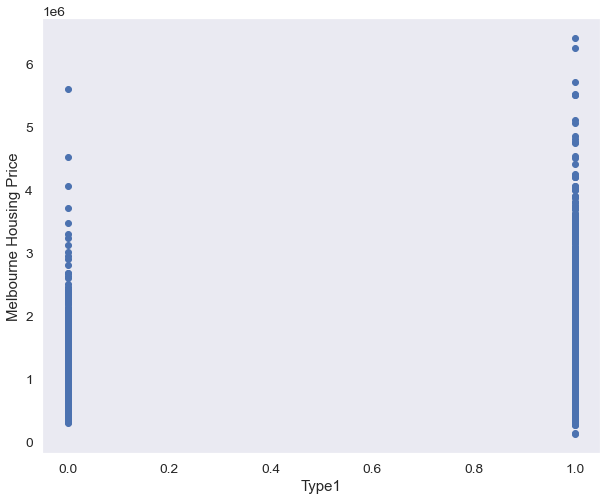

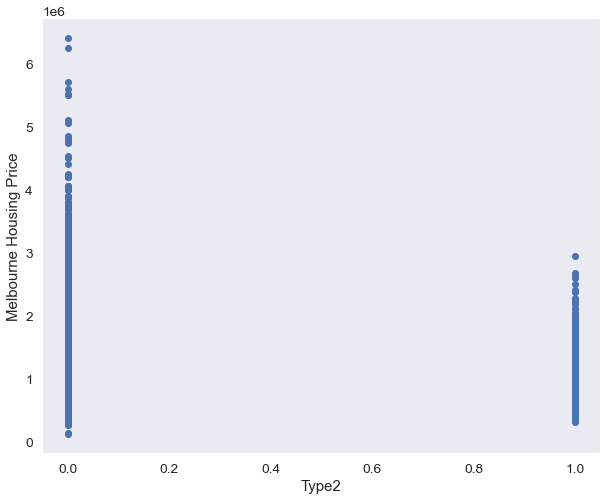

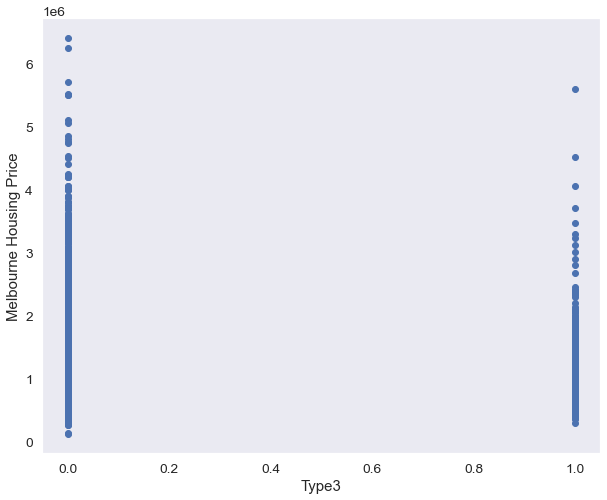

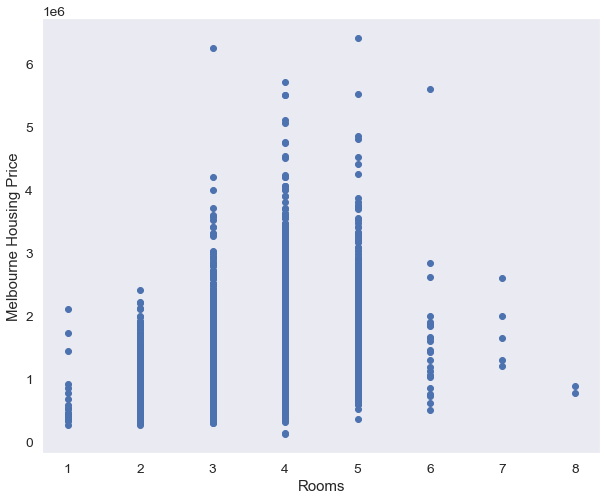

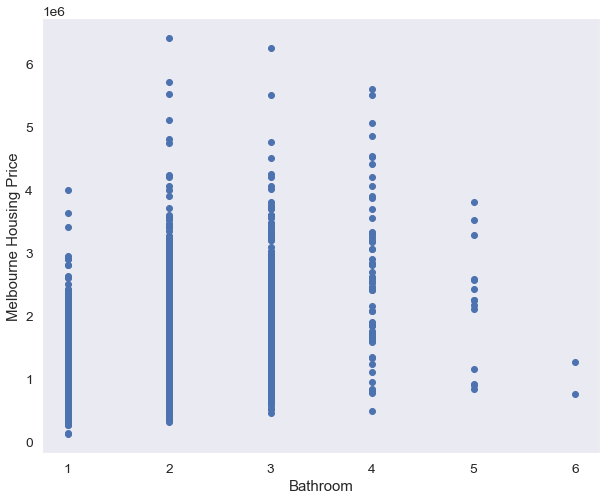

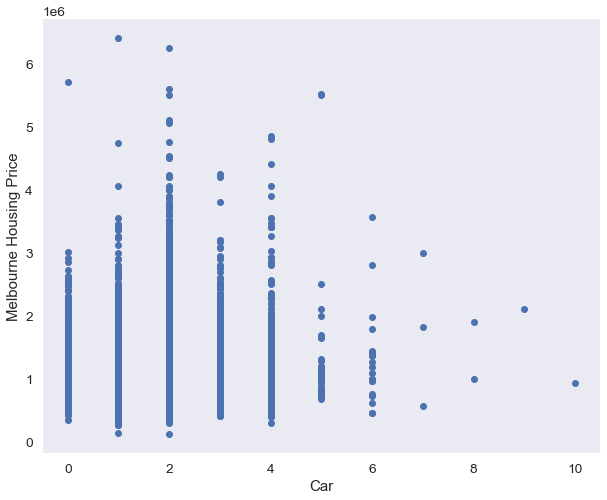

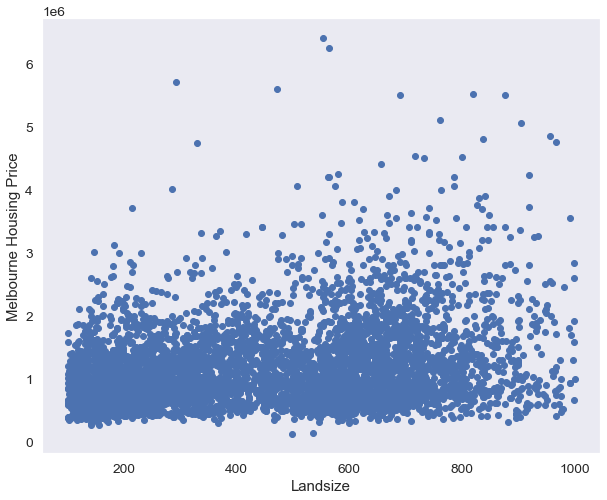

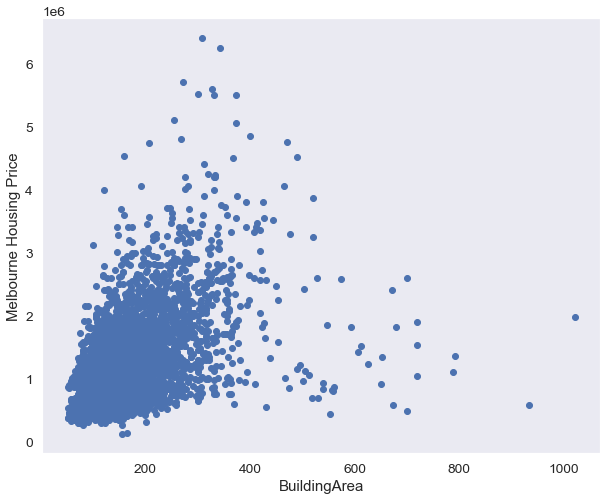

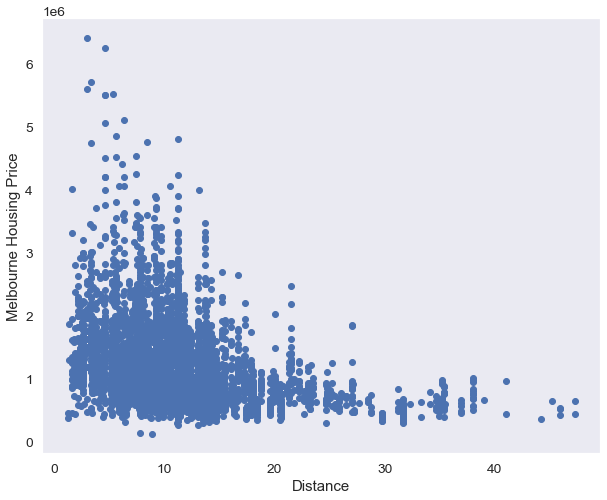

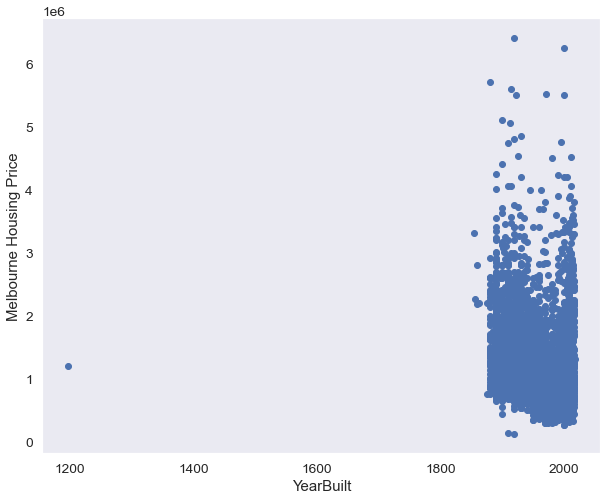

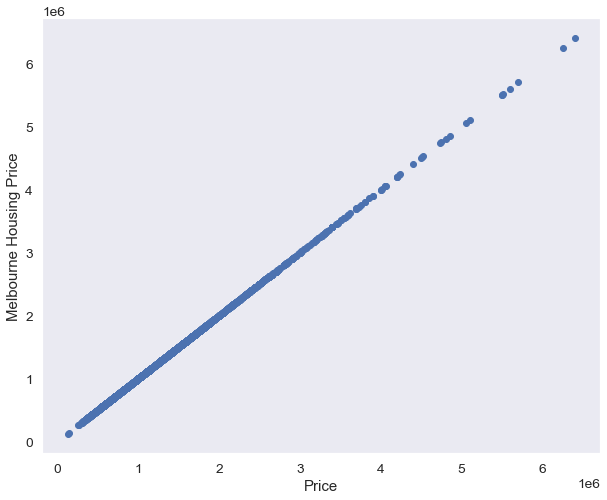

In [135]:
# All the columns
for each in df.columns:
    plt.scatter(df[each], df['Price'])
    plt.xlabel(each)
    plt.ylabel("Melbourne Housing Price")
    plt.grid()
    plt.show()

### Visualizing the distribution of the numeric features

/Users/jessicazhang/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

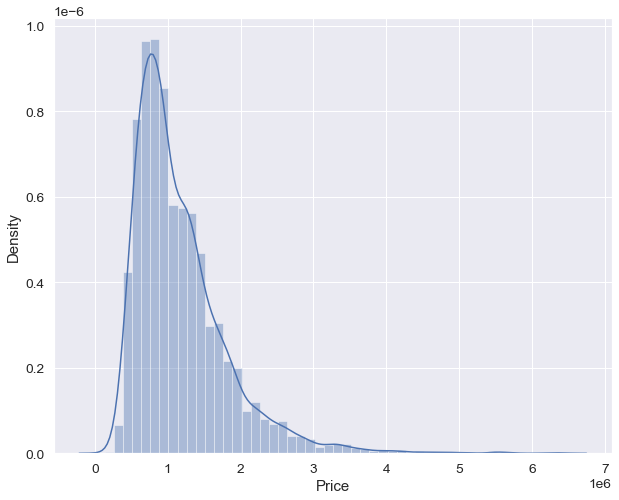

In [137]:
sns.distplot(df['Price'])

In [138]:
# calculate the skewness
print("Skewness: %f" %df['Price'].skew())

Skewness: 2.003863


###### Comment: Since Price is slightly right skewed, checking the distribution of transformed Price

/Users/jessicazhang/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


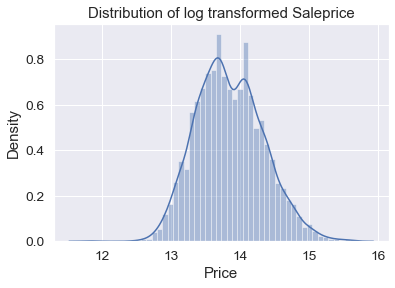

In [178]:
sns.distplot(np.log(df['Price']))
plt.title("Distribution of log transformed Saleprice")
plt.show()

# Log transformed Price is normally distributed, hence transformed data will be used for model building.
# Otherwise, we cannot use linear regression effectively.

# Adding Columns

## Single

array([[<AxesSubplot:title={'center':'Type1'}>,
        <AxesSubplot:title={'center':'Type2'}>,
        <AxesSubplot:title={'center':'Type3'}>],
       [<AxesSubplot:title={'center':'Rooms'}>,
        <AxesSubplot:title={'center':'Bathroom'}>,
        <AxesSubplot:title={'center':'Car'}>],
       [<AxesSubplot:title={'center':'Landsize'}>,
        <AxesSubplot:title={'center':'BuildingArea'}>,
        <AxesSubplot:title={'center':'Distance'}>],
       [<AxesSubplot:title={'center':'YearBuilt'}>,
        <AxesSubplot:title={'center':'Price'}>, <AxesSubplot:>]],
      dtype=object)

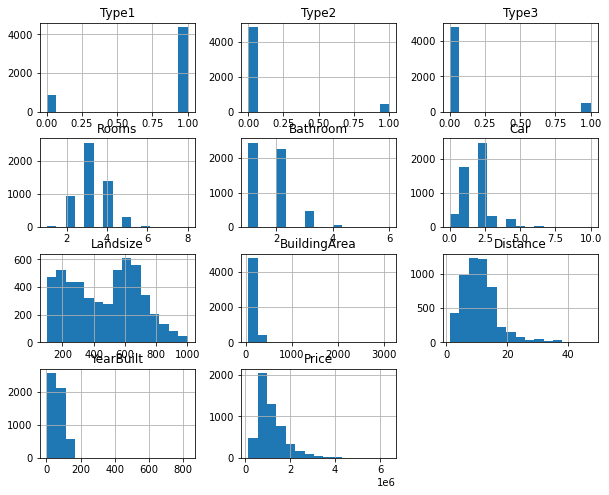

In [85]:
# histogram
df.hist(bins=15)

## 1. for x5^0.5

In [30]:
# x5 is the number of bathroom
# Bathroom_sqrt is the result of square of root

df['Bathroom_sqrt'] = np.sqrt(df['Bathroom'])
df.head()

,Type1,Type2,Type3,Rooms,Bathroom,Car,Landsize,BuildingArea,Distance,YearBuilt,Price,Bathroom_sqrt
0,0,0,1,5,2,1,531,1022.0,5.6,1890,1975000,1.414214
1,1,0,0,3,1,1,532,934.0,16.3,1980,580500,1.000000
2,1,0,0,3,1,1,792,792.0,12.2,1950,1365000,1.000000
3,1,0,0,5,3,2,836,789.0,24.8,2001,1100000,1.732051
4,1,0,0,3,1,2,713,720.0,9.2,1950,1903000,1.000000


## 2. for x5^2

In [32]:
# Bathroom_sqr means Bathroom*Bathroom
# pow() means the square
# i.e. pow(4,2) = 4^2 = 16

df['Bathroom_sqr'] = pow(df['Bathroom'],2)
df.head()

,Type1,Type2,Type3,Rooms,Bathroom,Car,Landsize,BuildingArea,Distance,YearBuilt,Price,Bathroom_sqr
0,0,0,1,5,2,1,531,1022.0,5.6,1890,1975000,4
1,1,0,0,3,1,1,532,934.0,16.3,1980,580500,1
2,1,0,0,3,1,1,792,792.0,12.2,1950,1365000,1
3,1,0,0,5,3,2,836,789.0,24.8,2001,1100000,9
4,1,0,0,3,1,2,713,720.0,9.2,1950,1903000,1


## 3. for x8^0.5

In [38]:
# x8 is the building area
# BuildingArea_sqr is the square root.

df['BuildingArea_sqrt'] = np.sqrt(df['BuildingArea'])
df.head()

,Type1,Type2,Type3,Rooms,Bathroom,Car,Landsize,BuildingArea,Distance,YearBuilt,Price,BuildingArea_sqrt
0,0,0,1,5,2,1,531,1022.0,5.6,1890,1975000,31.968735
1,1,0,0,3,1,1,532,934.0,16.3,1980,580500,30.561414
2,1,0,0,3,1,1,792,792.0,12.2,1950,1365000,28.142495
3,1,0,0,5,3,2,836,789.0,24.8,2001,1100000,28.089144
4,1,0,0,3,1,2,713,720.0,9.2,1950,1903000,26.832816


## 4. for x8^2

In [40]:
# BuildingArea_sqr is the square result.

df['BuildingArea_sqr'] = pow(df['BuildingArea'],2)
df.head()

,Type1,Type2,Type3,Rooms,Bathroom,Car,Landsize,BuildingArea,Distance,YearBuilt,Price,BuildingArea_sqr
0,0,0,1,5,2,1,531,1022.0,5.6,1890,1975000,1044484.0
1,1,0,0,3,1,1,532,934.0,16.3,1980,580500,872356.0
2,1,0,0,3,1,1,792,792.0,12.2,1950,1365000,627264.0
3,1,0,0,5,3,2,836,789.0,24.8,2001,1100000,622521.0
4,1,0,0,3,1,2,713,720.0,9.2,1950,1903000,518400.0


## 5. for x9^0.5

In [42]:
# x9 is the distance
# Distance_sqrt is the square root.

df['Distance_sqrt'] = np.sqrt(df['Distance'])
df.head()

,Type1,Type2,Type3,Rooms,Bathroom,Car,Landsize,BuildingArea,Distance,YearBuilt,Price,Distance_sqrt
0,0,0,1,5,2,1,531,1022.0,5.6,1890,1975000,2.366432
1,1,0,0,3,1,1,532,934.0,16.3,1980,580500,4.037326
2,1,0,0,3,1,1,792,792.0,12.2,1950,1365000,3.492850
3,1,0,0,5,3,2,836,789.0,24.8,2001,1100000,4.979960
4,1,0,0,3,1,2,713,720.0,9.2,1950,1903000,3.033150


## 6. for x9^2

In [45]:
# Distance_sqr is the square.

df['Disctance_sqr'] = pow(df['Distance'],2)
df.head()

,Type1,Type2,Type3,Rooms,Bathroom,Car,Landsize,BuildingArea,Distance,YearBuilt,Price,Disctance_sqr
0,0,0,1,5,2,1,531,1022.0,5.6,1890,1975000,31.36
1,1,0,0,3,1,1,532,934.0,16.3,1980,580500,265.69
2,1,0,0,3,1,1,792,792.0,12.2,1950,1365000,148.84
3,1,0,0,5,3,2,836,789.0,24.8,2001,1100000,615.04
4,1,0,0,3,1,2,713,720.0,9.2,1950,1903000,84.64


## 7. combination

In [212]:
# X8 is the building area
# pow() means the square of the number
# i.e. pow(4,2) = 4*4 = 16

df['BuildingArea_sqr'] = pow(df['BuildingArea'],2)
df['Distance_sqr'] = pow(df['Distance'], 2)
df['Bathroom_sqrt']=np.sqrt(df['Bathroom'])

df.head()

,Type1,Type2,Type3,Rooms,Bathroom,Car,Landsize,BuildingArea,Distance,YearBuilt,Price,BuildingArea_sqr,Distance_sqr,Bathroom_sqrt
0,0,0,1,5,2,1,531,1022.0,5.6,1890,1975000,1044484.0,31.36,1.414214
1,1,0,0,3,1,1,532,934.0,16.3,1980,580500,872356.0,265.69,1.000000
2,1,0,0,3,1,1,792,792.0,12.2,1950,1365000,627264.0,148.84,1.000000
3,1,0,0,5,3,2,836,789.0,24.8,2001,1100000,622521.0,615.04,1.732051
4,1,0,0,3,1,2,713,720.0,9.2,1950,1903000,518400.0,84.64,1.000000


# Spliting into Train and Test Data

In [211]:
df["YearBuilt"] = 2021 - df["YearBuilt"]
df.head()

,Type1,Type2,Type3,Rooms,Bathroom,Car,Landsize,BuildingArea,Distance,YearBuilt,Price
0,0,0,1,5,2,1,531,1022.0,5.6,1890,1975000
1,1,0,0,3,1,1,532,934.0,16.3,1980,580500
2,1,0,0,3,1,1,792,792.0,12.2,1950,1365000
3,1,0,0,5,3,2,836,789.0,24.8,2001,1100000
4,1,0,0,3,1,2,713,720.0,9.2,1950,1903000


In [213]:
# Drop the last column
X = df.drop(['Price'], axis = 1)

In [214]:
X

,Type1,Type2,Type3,Rooms,Bathroom,Car,Landsize,BuildingArea,Distance,YearBuilt,BuildingArea_sqr,Distance_sqr,Bathroom_sqrt
0,0,0,1,5,2,1,531,1022.0,5.6,1890,1044484.0,31.36,1.414214
1,1,0,0,3,1,1,532,934.0,16.3,1980,872356.0,265.69,1.000000
2,1,0,0,3,1,1,792,792.0,12.2,1950,627264.0,148.84,1.000000
3,1,0,0,5,3,2,836,789.0,24.8,2001,622521.0,615.04,1.732051
4,1,0,0,3,1,2,713,720.0,9.2,1950,518400.0,84.64,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5262,1,0,0,1,1,1,480,53.0,3.3,1930,2809.0,10.89,1.000000
5263,0,0,1,1,1,1,546,51.0,1.2,2000,2601.0,1.44,1.000000
5264,1,0,0,2,1,1,483,51.0,6.6,1970,2601.0,43.56,1.000000
5265,1,0,0,3,1,1,355,51.0,11.4,1960,2601.0,129.96,1.000000


In [215]:
# y = np.log(df["Price"]) is the trick

y = df["Price"]
print(y)

0       1975000
1        580500
2       1365000
3       1100000
4       1903000
         ...   
5262     540000
5263     370000
5264     540000
5265     867000
5266     380500
Name: Price, Length: 5267, dtype: int64


In [216]:
# Divide the data into two groups: training set and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=320, test_size=0.27)

In [217]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3844, 13)
(1423, 13)
(3844,)
(1423,)


In [218]:
model = LinearRegression()

In [219]:
model.fit(X_train, y_train)

LinearRegression()

In [220]:
y_pred_class = model.predict(X_test)

In [221]:
y_pred_class

array([ 797654.82251206, 1295109.25741079,  898706.3553123 , ...,
       1837570.53319213, 1632339.39909412,  719033.7225168 ])

## Model Evaluation

In [222]:
# Note


###################################### Before normalized ###################################
# -- the orginal score is 0.57022

#########################################SINGLE#############################################

# for x5
# (1) score: 0.56757
# (2) score: 0.57051

# for x8
# (3) score: 0.58560
# (4) score: 0.56198

# for x9
# (5) score: 0.58457
# (6) score: 0.58563

# If we use (7), we can get the highest score. It's 0.60877...


# ###################################### After normalized ###################################
# -- the original score is 0.61821
# -- RMSE is 0.2404

# If we use (7), we can get the highest score. It's 0.65787
# And RMSE is 0.2277

In [223]:
model.score(X_test, y_test)

0.6087749018727847

In [224]:
model.coef_

array([-3.86849937e+03,  1.87998353e+04, -1.49313360e+04,  7.35087214e+03,
        5.97159297e+05,  6.44802766e+03,  4.65449121e+02,  6.78802848e+03,
       -7.29959130e+04, -3.92393559e+03, -6.96674152e+00,  1.09790492e+03,
       -1.12073916e+06])

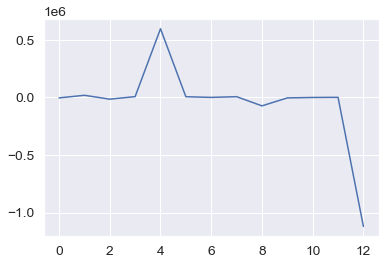

In [225]:
# visualize the coefficients
import matplotlib.pyplot as plt
%matplotlib inline 
# same as plt.show()
plt.plot(model.coef_)

In [226]:
model.predict(X_test)

array([ 797654.82251206, 1295109.25741079,  898706.3553123 , ...,
       1837570.53319213, 1632339.39909412,  719033.7225168 ])

In [227]:
y_test

2187    1300000
3944    1005000
4631     750000
3196     861500
2635     645000
         ...   
70      3400000
2822    1460000
836     3270000
791      685000
2984     822500
Name: Price, Length: 1423, dtype: int64

In [228]:
y_test.shape

(1423,)

In [229]:
deviation = model.predict(X_test) - y_test

In [230]:
deviation

2187   -5.023452e+05
3944    2.901093e+05
4631    1.487064e+05
3196   -1.423104e+05
2635    2.094901e+05
            ...     
70     -9.018587e+05
2822   -1.907375e+05
836    -1.432429e+06
791     9.473394e+05
2984   -1.034663e+05
Name: Price, Length: 1423, dtype: float64

In [231]:
# Root Mean Squared Error
RMSE = np.sum(np.sqrt(deviation * deviation))/1423
RMSE

286751.4690966534

In [232]:
result = {'prediction':model.predict(X_test)}

In [233]:
result_file = pd.DataFrame(result)

In [234]:
result_file.head()

,prediction
0,7.976548e+05
1,1.295109e+06
2,8.987064e+05
3,7.191896e+05
4,8.544901e+05


In [235]:
result_file.to_csv("Linear_Regression.csv")

# Result Visualization

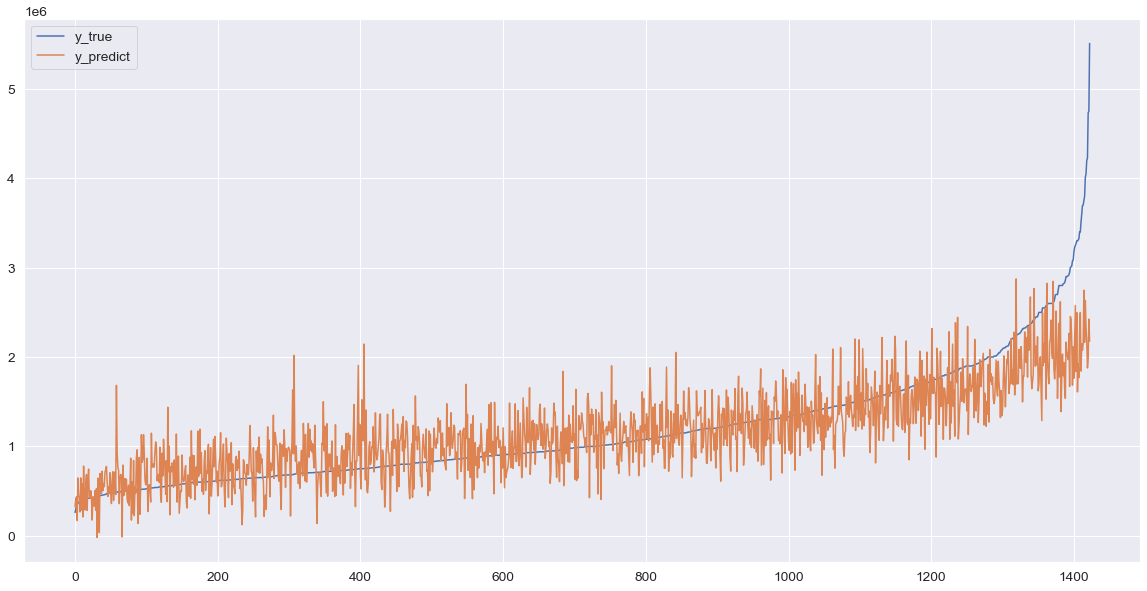

In [236]:
y_predict = result['prediction']
y_test_arr = np.array(list(y_test))
argsort = np.argsort(list(y_test_arr))
sorted_y_test = y_test_arr[argsort]
sorted_y_predict = y_predict[argsort]

index_x = [w for w in range(len(y_predict))]
plt.figure(figsize=(20,10))
plt.plot(index_x, sorted_y_test)

plt.plot(index_x, sorted_y_predict)
plt.legend(['y_true', 'y_predict'])